In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Checking Dataset

In [2]:
data = pd.read_excel('c://Users/ilike/1.data/lab-cleaning-numerical-data/4.01_dataset.xlsx')
data#.head()

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,RFA_2,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
0,95515,IL,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,L4E,31,4.0,10.0,7.741935,0.0
1,148535,CA,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,L2G,3,18.0,25.0,15.666667,0.0
2,15078,NC,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,L4E,27,12.0,5.0,7.481481,0.0
3,172556,CA,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,L4E,16,9.0,10.0,6.812500,0.0
4,7112,FL,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,L2F,37,14.0,15.0,6.864865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,AK,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,L1G,1,NaN,25.0,25.000000,0.0
95408,122706,TX,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,L1F,1,NaN,20.0,20.000000,0.0
95409,189641,MI,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,L3E,7,3.0,10.0,8.285714,0.0
95410,4693,CA,XXXX,,F,C1,7.0,H,2421,2459,11,10,552,544,568,556,15948,,127,36,9,31,L4F,41,4.0,18.0,12.146341,18.0


In [3]:
data.shape

(95412, 28)

In [4]:
data.describe()

,CONTROLN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
count,95412.000000,74126.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,85439.000000,95412.000000,95412.000000,95412.000000
mean,95778.176959,3.886248,1061.838238,1133.031086,4.224249,3.875886,340.056387,387.027114,387.418302,430.792961,15722.738230,46.973347,18.435144,5.348939,12.856936,9.602031,8.093739,17.313127,13.347786,0.793073
std,55284.596094,1.854960,941.765892,947.384618,2.307938,2.244389,162.883283,173.614627,161.270738,171.643319,8563.646776,22.970378,8.583794,1.219785,4.544033,8.554342,8.213242,13.956630,10.769997,4.429725
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.285714,0.000000
25%,47910.750000,2.000000,513.000000,555.000000,3.000000,2.000000,231.000000,274.000000,277.000000,314.000000,10788.000000,27.000000,11.000000,5.000000,11.000000,3.000000,4.000000,10.000000,8.384615,0.000000
50%,95681.500000,4.000000,737.000000,803.000000,4.000000,3.000000,310.000000,355.000000,354.000000,397.000000,13727.500000,47.000000,18.000000,6.000000,12.000000,7.000000,6.000000,15.000000,11.636364,0.000000
75%,143643.500000,5.000000,1213.000000,1328.250000,5.000000,5.000000,414.000000,465.000000,466.000000,514.000000,18169.000000,64.000000,25.000000,6.000000,13.000000,13.000000,11.000000,20.000000,15.477955,0.000000
max,191779.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,174523.000000,195.000000,61.000000,19.000000,78.000000,237.000000,1088.000000,1000.000000,1000.000000,200.000000


In [5]:
# Checking for nulls:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

,percentage
INCOME,22.309563
TIMELAG,10.452564


In [6]:
# Checking correlations with the target:
data.corr()['TARGET_D'].sort_values(ascending=False)

TARGET_D    1.000000
LASTGIFT    0.061678
AVGGIFT     0.044299
HV2         0.039860
HV1         0.039081
IC5         0.037328
IC4         0.035952
IC2         0.035496
IC3         0.033786
INCOME      0.032063
IC1         0.031780
HV3         0.030915
HV4         0.030867
NUMPRM12    0.025134
NUMPROM     0.017337
CARDPM12    0.016358
CONTROLN    0.013366
CARDPROM    0.011302
NGIFTALL    0.004899
TIMELAG     0.003612
Name: TARGET_D, dtype: float64

In [7]:
data.corr()['TARGET_D'][['INCOME', 'TIMELAG']]

INCOME     0.032063
TIMELAG    0.003612
Name: TARGET_D, dtype: float64

### Dealing with NaNs

### Filling NaNs for categorical columns

How could we find out gender value when this field is null?

In [8]:
data['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [9]:
data['GENDER'] = data['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'O')

data['GENDER'].value_counts()

# Another option would have been to fill the nans with the mode (highest count category, in this case F)

F    51277
M    39094
O     5041
Name: GENDER, dtype: int64

The Homeownership has two values [H = Homeowner, U = Unknown]. If you had to fill null values, how would it be?

In [10]:
data['HOMEOWNR'].value_counts()

H    52354
     22228
U    20830
Name: HOMEOWNR, dtype: int64

In this case, makes sense that the missing data is converted to U (unknown), since it is a class that already exists and if the value is missing you don't know if the person is a home owner.

In [11]:
data['HOMEOWNR'] = np.where(data['HOMEOWNR'] != 'H', 'U', 'H')
data['HOMEOWNR'].value_counts()

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

### Filling NaNs for numerical columns

#### Using Mean or Median

0         4.0
1        18.0
2        12.0
3         9.0
4        14.0
         ... 
95407     NaN
95408     NaN
95409     3.0
95410     4.0
95411     6.0
Name: TIMELAG, Length: 95412, dtype: float64

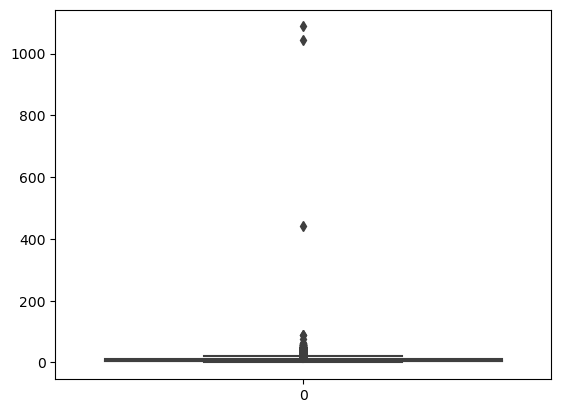

In [12]:
# best plot to check for outliers
# best plot to check for outliers
sns.boxplot(data['TIMELAG'])
data['TIMELAG']

In [13]:
data['TIMELAG'].median(), data['TIMELAG'].mean()

(6.0, 8.093739393017241)

In [14]:
# for 'TIMELAG' I'll choose median to replace the NaNs
# since we have considerable outliers as we saw in .describe() and in the plot above
data['TIMELAG'] = data['TIMELAG'].fillna(data['TIMELAG'].median())


<Axes: >

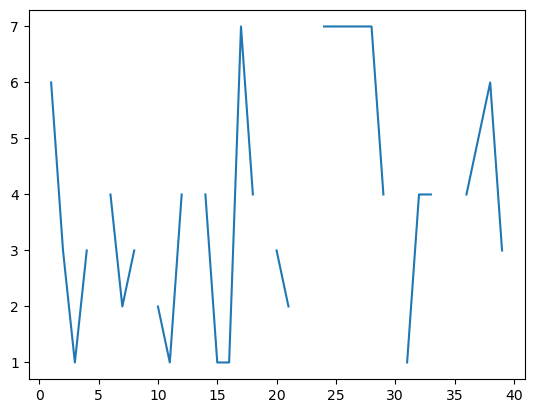

In [15]:
data['INCOME'][0:40].plot()

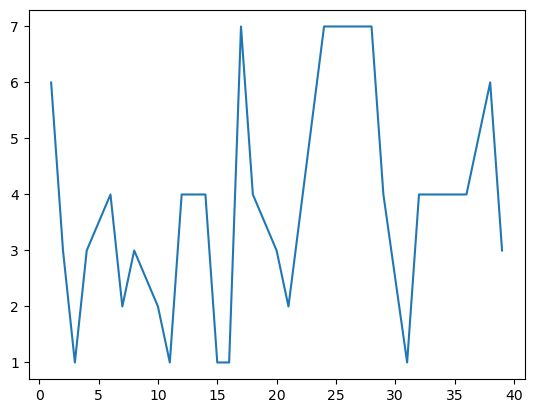

In [16]:
new_income_data = data['INCOME'][0:40].interpolate(method='linear')
# linear interpolation assumes that the rate of change between the values is constant
new_income_data.plot()
plt.show()

#### Comparing distributions to choose which technique to use:

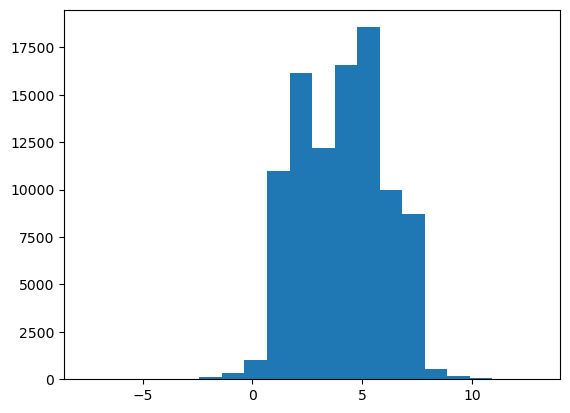

In [17]:
# you can try different methods and check which ones are more normally distributed
plt.hist(data['INCOME'].interpolate(method='polynomial', order=2), bins=20)
plt.show()

In [18]:
# Above we used interpolation on "Income" just for demonstration.
# We will be replacing the nulls with 0, assuming that is what would the data be in "real life":
data['INCOME'].value_counts()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [19]:
data['INCOME'] = data['INCOME'].fillna(0)
data['INCOME'].isna().sum()

0

### Checking outliers

We start checking for outliers on the target variable:

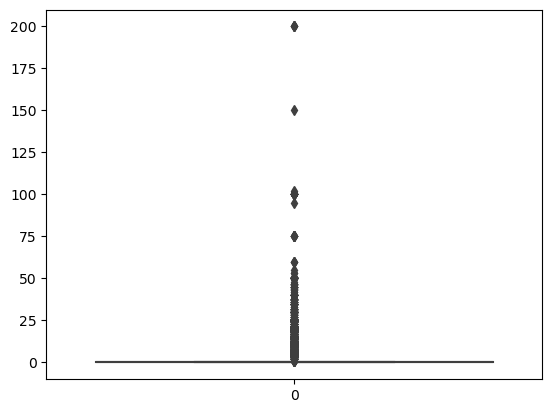

In [20]:
# best plot to check for outliers
sns.boxplot(data['TARGET_D'])
plt.show()

<Axes: xlabel='TARGET_D', ylabel='Density'>

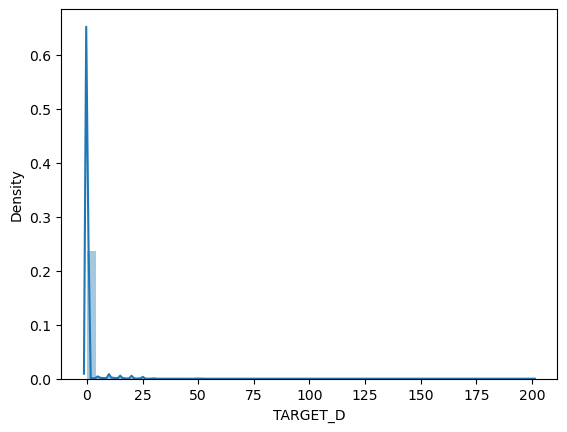

In [21]:
# getting a better look at the distribution:
sns.distplot(data['TARGET_D'])

In [22]:
# An interesting insight, is that about 95% of the donors, did not donate in the previous compaign
data[data['TARGET_D'] == 0]

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,RFA_2,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
0,95515,IL,XXXX,,F,T2,0.0,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,L4E,31,4.0,10.0,7.741935,0.0
1,148535,CA,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,L2G,3,18.0,25.0,15.666667,0.0
2,15078,NC,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,L4E,27,12.0,5.0,7.481481,0.0
3,172556,CA,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,L4E,16,9.0,10.0,6.812500,0.0
4,7112,FL,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,L2F,37,14.0,15.0,6.864865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95406,35088,FL,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,L4D,24,3.0,2.0,3.375000,0.0
95407,184568,AK,XXXX,,M,C2,0.0,U,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,L1G,1,6.0,25.0,25.000000,0.0
95408,122706,TX,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,L1F,1,6.0,20.0,20.000000,0.0
95409,189641,MI,XXXX,X,M,C3,0.0,U,376,377,4,3,263,264,319,345,12178,,33,14,7,17,L3E,7,3.0,10.0,8.285714,0.0


<Axes: xlabel='TARGET_D', ylabel='Density'>

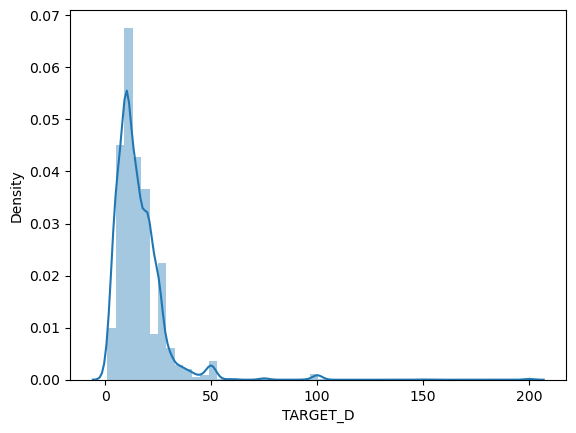

In [23]:
# So, let's take a look at the distribution without the zeros, to better determine outliers:
sns.distplot(data[(data['TARGET_D'] > 0)]['TARGET_D']) #  & (data['TARGET_D'] < 50)

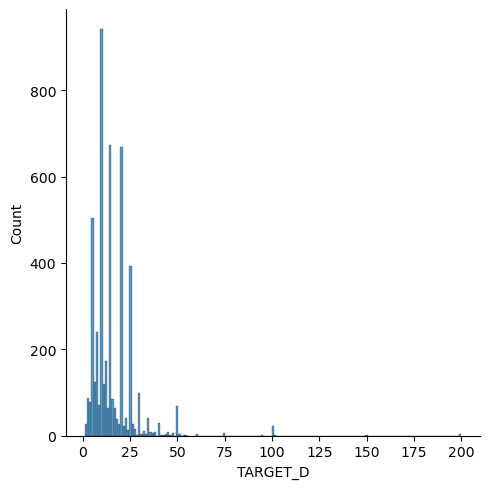

In [24]:
sns.displot(data[data['TARGET_D'] > 0]['TARGET_D'])

In [25]:
# out of all the donors, very few donated above 50, so maybe we can consider those outliers:
print("Donors:", len(data[(data['TARGET_D'] > 0)]))
print("Donations > 50:", len(data[data['TARGET_D'] > 50]))

Donors: 4843
Donations > 50: 46


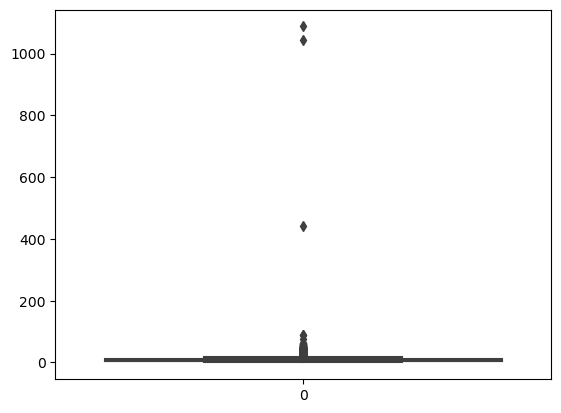

In [26]:
sns.boxplot(data['TIMELAG'])
plt.show()